In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

In [2]:
fruit = pd.read_table("/Users/xanderito-low/Desktop/Sem 2/Machine learning/fruit_data_with_colors.txt")
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


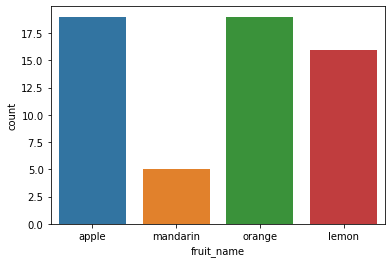

In [3]:
sns.countplot(fruit['fruit_name'],label="Count")
plt.show()

In [4]:
fruit_vector=fruit[["fruit_name","mass","width","height","color_score"]]
fruit_vector.head()

,fruit_name,mass,width,height,color_score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79


In [5]:
#Side note for me in the future: iloc just gets specific vals in list using slice methods first rows then cols
X = fruit_vector.iloc[:,1:].values
y = fruit_vector.iloc[:,0].values
print(X[0:6])
print(y[0:6])

[[192.     8.4    7.3    0.55]
 [180.     8.     6.8    0.59]
 [176.     7.4    7.2    0.6 ]
 [ 86.     6.2    4.7    0.8 ]
 [ 84.     6.     4.6    0.79]
 [ 80.     5.8    4.3    0.77]]
['apple' 'apple' 'apple' 'mandarin' 'mandarin' 'mandarin']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4321)
print("X_train shape:", X_train.shape) 
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (41, 4)
y_train shape: (41,)
X_test shape: (18, 4)
y_test shape: (18,)


In [7]:
 scaler = StandardScaler()  
 scaler.fit(X_train)
 X_train = scaler.transform(X_train)  
 X_test = scaler.transform(X_test)

In [8]:
for k in range(1,9):
 classifier = KNeighborsClassifier(n_neighbors=k)  
 classifier.fit(X_train, y_train)
 y_pred = classifier.predict(X_test)
 print(confusion_matrix(y_test, y_pred))
 print("kNN %):", metrics.accuracy_score(y_test, y_pred)*100)
 print()

[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 6]]
kNN %): 100.0

[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 6]]
kNN %): 100.0

[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 6]]
kNN %): 100.0

[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 6]]
kNN %): 100.0

[[4 0 0 3]
 [0 2 0 0]
 [0 3 0 0]
 [0 0 0 6]]
kNN %): 66.66666666666666

[[4 0 0 3]
 [0 2 0 0]
 [0 3 0 0]
 [0 1 0 5]]
kNN %): 61.111111111111114

[[2 0 0 5]
 [0 2 0 0]
 [0 2 0 1]
 [0 0 0 6]]
kNN %): 55.55555555555556

[[2 0 0 5]
 [0 2 0 0]
 [0 2 0 1]
 [0 2 0 4]]
kNN %): 44.44444444444444



In [9]:
classifier = GaussianNB()
y_pred = classifier.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))
# print(classifier.predict_proba(X_test))
print("Gauusian %):", metrics.accuracy_score(y_test, y_pred)*100)

[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [2 0 0 4]]
Gauusian %): 88.88888888888889


In [10]:
# Split the dataset by class values, returns separated classes
def separate_by_class(dataset,y):
   separated = dict()
   for i in range (len(dataset)):
    vector = dataset[i]
    classValue = y[i]
    if classValue not in separated:
        separated[classValue] = list()
    separated[classValue].append(vector)
   return separated    
    

In [11]:
separated = separate_by_class(X_train,y_train)
for label in separated:
    print(label)
    for row in separated[label]:
        print(row)

mandarin
[-1.82753952 -1.56031839 -2.94486615  0.54956872]
[-1.73671634 -1.42303716 -2.69471523  0.27478436]
lemon
[ 0.89715576  0.36161885  2.22491959 -0.68696091]
[-1.01013093 -1.42303716 -0.27658964 -0.68696091]
[ 0.80633259  0.36161885  1.55785046 -0.68696091]
[-0.91930776 -1.42303716  0.47386313 -0.41217654]
[-0.96471934 -1.28575593  0.22371221 -0.96174527]
[ 1.26044847  0.36161885  1.97476867 -0.82435309]
[-0.69224982 -1.42303716  0.30709585 -0.82435309]
[-0.96471934 -1.56031839  0.14032857 -0.68696091]
[-1.01013093 -1.01119346 -0.10982236 -0.68696091]
[ 0.57927465  0.22433762  1.14093226 -0.68696091]
[-0.19272235 -0.736631    0.55724677 -0.68696091]
[ 0.760921    0.22433762  2.05815231 -0.96174527]
[-0.64683823 -1.69759962  0.72401405 -0.54956872]
[-1.01013093 -1.56031839  0.22371221 -0.54956872]
orange
[ 0.07974718  0.22433762 -0.69350784  0.41217654]
[-0.46519188 -0.46206854 -0.6101242  -0.68696091]
[-0.011076   -0.05022484 -0.35997328  0.54956872]
[ 4.43925962  2.96996226  1.

In [12]:
#calculate the mean
def mean (numbers):
    return np.mean(numbers,axis = 0)

In [13]:
#calculate the variance
def calcVarience (numbers) :
    return np.var(numbers,axis = 0)

In [14]:
#we summarise the mean and variance for particular feature vectors
def summarize(dataset):
    summaries = [(mean(attribute), calcVarience(attribute),len(attribute)) for attribute in zip(*dataset)]
    return summaries
    

In [15]:
# this function takes in the dataset splits it up and summarises the dataset using the above calls
def summarizeByClass(dataset,y):
    separated = separate_by_class(dataset,y)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [16]:
#this is calculating the probability of a given value given mean and variance of a feature vector
def calculateProbability(x, mean,variance):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*variance)))
    result = (1/(math.sqrt(2*math.pi*variance)))*exponent
    return result

In [17]:
#  this calculates the class probabilities given the feature vector of the test subject
def calculateClassProbabilities(summaries, inputVector):
    total_rows = sum ([summaries[label][0][2] for label in summaries])
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = summaries[classValue][0][2]/float(total_rows)
        for i in range(len(classSummaries)):
            mean,variance,count = classSummaries[i] 
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x,mean,variance)
    return probabilities 

In [18]:
# predicts what class an input vector is in
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability>bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [19]:
#this classifies a class for a large set of data
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [20]:
summaries = summarizeByClass(X_train,y_train)

y_pred = getPredictions(summaries,X_test)
print(confusion_matrix(y_test,y_pred))
print("Gaussean %):", metrics.accuracy_score(y_test,y_pred)*100)



[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [2 0 0 4]]
Gaussean %): 88.88888888888889
